# CSN8010_Lab1 - Linear Regression California Housing

## 1. Analyzing the problem

The aim of this report is to understand the features that directly affect house prices in California (the dependent variable). For this, I will create 3 linear regression models using different features (independent variables), then compare the results between them, to see which one best predicts the median house value.

The California Housing dataset contains more than 20,000 rows of information about house prices.

In [1]:
# from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np




## 2. Data Collection
Source: Data from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [2]:
# Load csv into df
data_housing_ca = pd.read_csv('data/housing.csv')
#Showing first 5 rows
data_housing_ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 3. Data Exploration (EDA)

### 1. Statistics
This section will explore the data, showing some basic statistics and plots.

In [3]:
# The following function will show statistics of the dataset
data_housing_ca.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The average value of our dependent variable (house value) is 206,855.8 with a std of 115395.61. Showing spread in house prices.

### 2. Plotting Data
Visual plots for each independent variable with Seaborn.

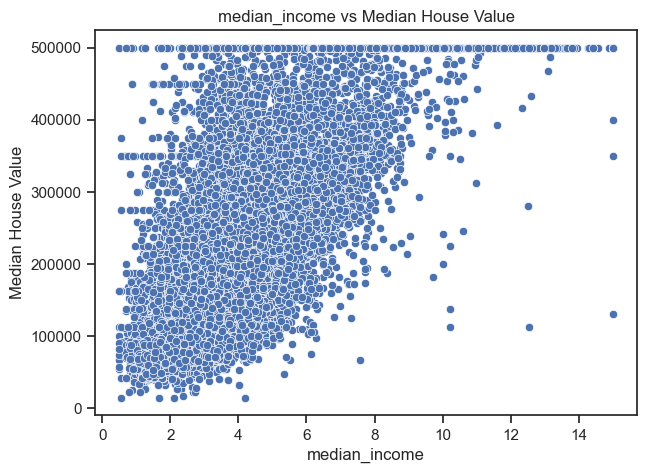

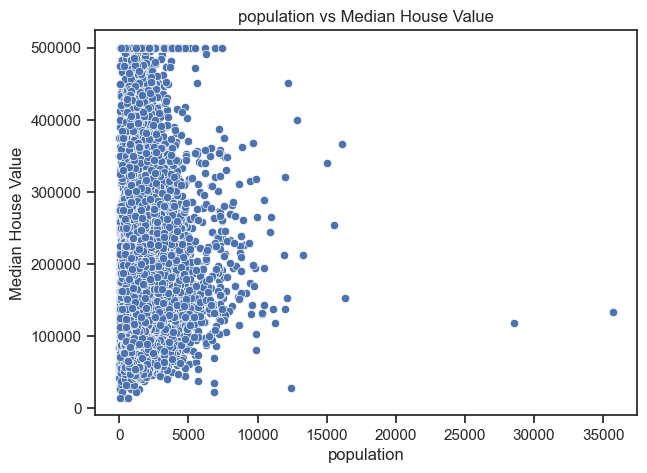

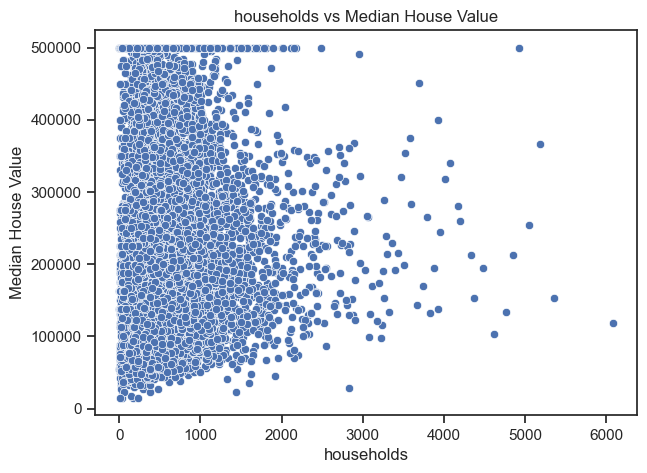

In [4]:
sns.set_theme(style="ticks")

ind_vars = ["median_income", "population", "households"] #Our independent variables

for col in ind_vars: 
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=data_housing_ca, x=col, y="median_house_value")
    plt.title(f"{col} vs Median House Value") 
    plt.xlabel(col)
    plt.ylabel('Median House Value')
    # plt.tight_layout()
    plt.show()



#### Interpretation

Based on those scatter plots, it is possible to see a clear positive correlation with the dependent variable, which means that the higher the average income, the higher the house value. Both household and population seem to have a weak or no linear relationship. Apparently, the median income could be a good predictor.

The idea is to fit a univariate linear regression model for each of the three variables, then compare their prediction errors and finally see if the Median Income has the strongest linear relationship with house value.



### 3. Description of the Variables

- **median_house_value**: This is the dependent variable. It ranges from 14,999 to 500,001. The std is 115K indicating data is spread. 50% of data are below 180, almost near the mean. The 500.001 seems to be a capping that we may need to handle.

- **median_income**: The mean is higher than the 50th percentile, so the distribution is probably right-skewed. Some outliers might be present, or there could be people with very high incomes affecting the mean.

- **population**: There are two visible outliers. The range goes from very small populations (3) to over 35,000 people, indicating high variability in population density. The standard deviation is also very high (1,132), showing that the data is widely spread.

- **households**: the number of households is very spread out, as the standard deviation is 382, which is almost as high as the mean (499). This also suggests the presence of some significant outliers.





## 4. Data Preparation
### Deleting outliers and other filters before train the model.

In [5]:
data_housing_cleaned = data_housing_ca[
    (data_housing_ca.median_house_value != 500001) &
    (data_housing_ca.population < 25000) &
    (data_housing_ca.households < 6000)
]

# Showing count before and after cleaning
print(f"Count before cleaning: {len(data_housing_ca)}")
print(f"Count after cleaning: {len(data_housing_cleaned)}")

Count before cleaning: 20640
Count after cleaning: 19673


### Train and Test Split
By using the approach 80%-20%

In [6]:
x_dependents= data_housing_cleaned[ind_vars]
y=data_housing_cleaned['median_house_value']
X_train_all, X_test_all, y_train, y_test = train_test_split(x_dependents, y, test_size=0.2, random_state=42)


## 4. Architecture Model
Creating the linear regression model.
- *dependent variable:* median house value
- *independent variables:*
    - median income
    - population
    - number of households

In [7]:
results = []

# for to train the model per each independent variable
for feature in ind_vars:
    X_train = X_train_all[[feature]]
    X_test = X_test_all[[feature]]
    
    # Creating the LR object
    model_PR = LinearRegression()
    # Fitting the model
    model_PR.fit(X_train, y_train)

    # Predicting the values in the test set
    y_pred_test = model_PR.predict(X_test)
    y_pred_train= model_PR.predict(X_train)

    # Calculating the metrics
    mae  = mean_absolute_error(y_test, y_pred_test)
    mse  = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test, y_pred_test)

    mse_train  = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)

    #Printing the results in a list to evaluate later
    results.append({
    'Feature': feature,
    'Intercept': model_PR.intercept_,
    'Slope': model_PR.coef_[0], # same Coefficient
    'MSE': mse,
    'RMSE': rmse,
    'RMSE_TRAIN': rmse_train,
    'MAE': mae,
    'R2': r2
    })


### 5. Printing the models' result
Printing the list in a df

In [8]:
results_df = pd.DataFrame(results).round(2)
results_df

,Feature,Intercept,Slope,MSE,RMSE,RMSE_TRAIN,MAE,R2
0,median_income,45431.79,40074.69,5.745576e+09,75799.58,74633.61,57424.90,0.41
1,population,190424.07,1.59,9.682137e+09,98397.85,97527.94,78981.86,-0.00
2,households,180087.98,25.21,9.603816e+09,97999.06,97067.96,78479.05,0.01


## 6. Evaluating models
Plotting results to compare.

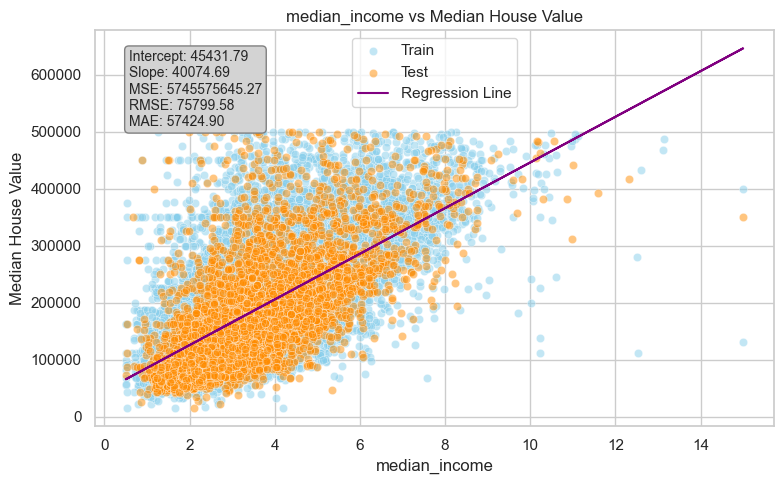

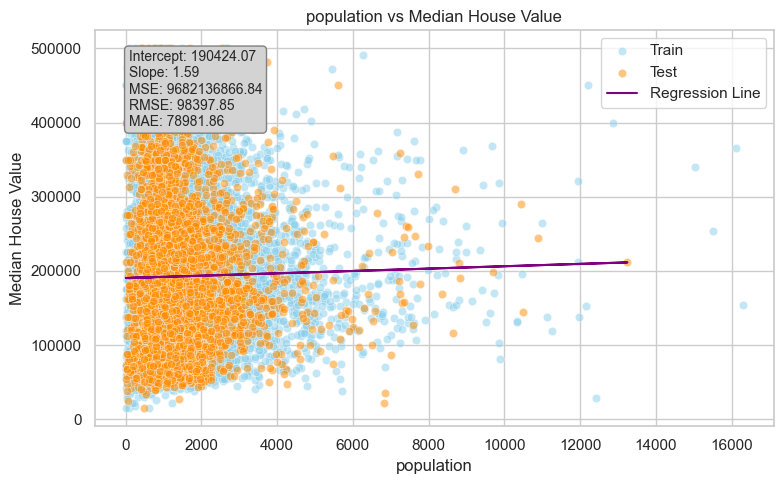

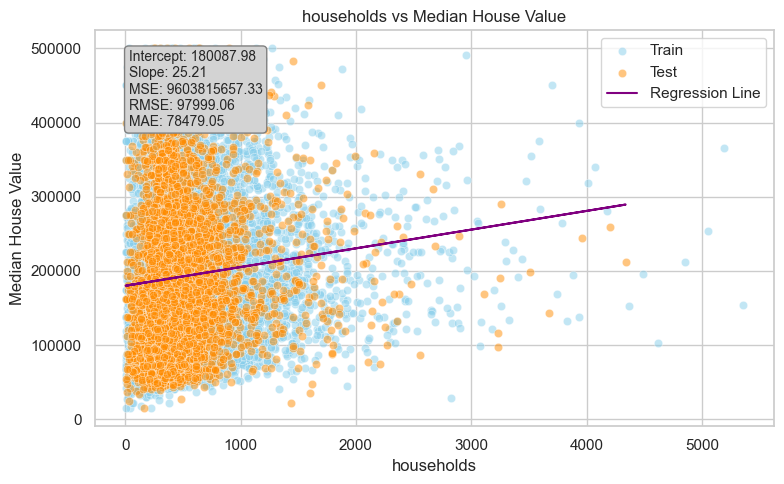

In [9]:
sns.set_theme( style="whitegrid")

#Plotting by each feature
for row in results_df.itertuples():
    feature = row.Feature
    intercept = row.Intercept
    slope = row.Slope
    mse = row.MSE
    rmse = row.RMSE
    mae = row.MAE

    x_train_feat = X_train_all[[feature]]
    x_test_feat = X_test_all[[feature]]
    y_train_feat = y_train
    y_test_feat = y_test

    # Prediction with the intercept and slope calculated previously
    y_pred = intercept + slope * x_test_feat
    residuals = y_test - y_pred

    plt.figure(figsize=(8, 5))
    # Plotting the observations, using different colors for train and test sets
    sns.scatterplot(x=x_train_feat[feature], y=y_train_feat, label="Train", alpha=0.5, color='skyblue')
    sns.scatterplot(x=x_test_feat[feature], y=y_test_feat, label="Test", alpha=0.5, color='darkorange')
    # plotting the regression line
    plt.plot(x_test_feat[feature], y_pred, color='purple', label="Regression Line")

    # Creating the text box with the metrics
    textstr = (
        f"Intercept: {intercept:.2f}\n"
        f"Slope: {slope:.2f}\n"
        f"MSE: {mse:.2f}\n"
        f"RMSE: {rmse:.2f}\n"
        f"MAE: {mae:.2f}"
    )
    plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
                   fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='lightgray', edgecolor='gray'))

    plt.title(f"{feature} vs Median House Value")
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.legend()
    plt.tight_layout()
    plt.show()


# 7. Presenting Solution

Comparing the three variables that we tested, median income is the best predictor of house prices.

This conclusion is based on the fact that this model explains **41% of the variation** in housing prices (R² metric), which is better than the models using other features (population or number of households).


Analyzing the RMSE:

In all models, the training set and test set are relatively closed. This suggest that models are not overfitting neither under-fitting, in other words the model is likely to be reliable and generalizable.

| **Feature**      | **RMSE**  | **RMSE_TRAIN** |
|:----------------|:----------|:--------------|
| median_income    | 75799.58  | 74633.61       |
| population       | 98397.85  | 97527.94       |
| households       | 97999.06  | 97067.96       |

The model using **median income** also has the lowest prediction error (around \$75,800), meaning it's the most accurate model we tested.


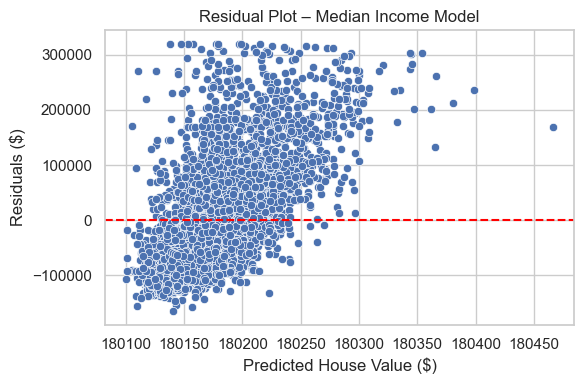

In [10]:
x = X_test_all["median_income"]
y_pred = intercept + slope * x
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted House Value ($)")
plt.ylabel("Residuals ($)")
plt.title("Residual Plot – Median Income Model")
plt.tight_layout()
plt.show()


The residual  plot for the metric  **median_income** also  shows that the residuals are roughly centered around zero, with no clear pattern. This reinforces my initial conclusion that this model is the best among the three. 
